<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Прогнозирование-оттока-клиентов-телекоммуникационной-компании" data-toc-modified-id="Прогнозирование-оттока-клиентов-телекоммуникационной-компании-1">Прогнозирование оттока клиентов телекоммуникационной компании</a></span><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.1">Цель проекта</a></span></li><li><span><a href="#Описание-услуг" data-toc-modified-id="Описание-услуг-1.2">Описание услуг</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3">Описание данных</a></span></li></ul></li><li><span><a href="#Импортирование-библиотек-и-изнакомление-с-данными" data-toc-modified-id="Импортирование-библиотек-и-изнакомление-с-данными-2">Импортирование библиотек и изнакомление с данными</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1">Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3">Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4">Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1">Вывод</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-5">Обучение моделей</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-6">Тестирование лучшей модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6.1">Вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7">Общий вывод</a></span></li></ul></div>

# Прогнозирование оттока клиентов телекоммуникационной компании

## Цель проекта

Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

## Описание услуг 

Оператор предоставляет два основных типа услуг: 

1. Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
2. Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.

## Описание данных

Данные состоят из файлов, полученных из разных источников:

- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец "customerID" содержит код клиента.

# Импортирование библиотек и изнакомление с данными

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%pip install catboost
from catboost import CatBoostClassifier

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

!pip install phik
import phik
from phik.report import plot_correlation_matrix
from phik import report

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable


*Загрузка данных*

In [2]:
try:
    contract = pd.read_csv('C:/Users/Andrey/telecom/contract_new.csv') 
    personal = pd.read_csv('C:/Users/Andrey/telecom/personal_new.csv')
    internet = pd.read_csv('C:/Users/Andrey/telecom/internet_new.csv')
    phone = pd.read_csv('C:/Users/Andrey/telecom/phone_new.csv')
except:
    contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv')  
    personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv')
    internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

Ознакомимся с данными договоров.

In [3]:
contract.info()
contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


В датафрейме с договорами пропуски отсутствуют.Можем изменить тип данных в столбце TotalCharges на числовой, в столбцах BeginDate и EndDate на datetime.

Ознакомимся с персональными данными клиентов.

In [4]:
personal.info()
personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


В датафрейме с персональными данными пропуски отсутствуют.

Ознакомимся с интернет-услугами.

In [5]:
internet.info()
internet.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


В датафрейме с интернет-услугами пропуски отсутствуют.

Ознакомимся с услугами телефонии.

In [6]:
phone.info()
phone.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


В датафрейме с услугами телефонии пропуски отсутствуют.

## Вывод

- Ознакомились с целью проекта,описанием услуг, описанием данных.
- Импортировали библиотеки и загрузили данные. 
- Изучили общую информацию датафреймов.

# Предобработка данных

Переименуем столбцы для более понятного восприятия.

In [7]:
contract = contract.rename(columns={'customerID': 'CustomerID'})
personal = personal.rename(columns={'customerID': 'CustomerID', 'gender': 'Gender'})
internet = internet.rename(columns={'customerID': 'CustomerID'})
phone = phone.rename(columns={'customerID': 'CustomerID'})

Объединим датафреймы в один для комфортного дальнейшего анализа.Объединять будем по признаку "СustomerID".

In [8]:
df = contract.merge(personal, how='left', on='CustomerID').merge(internet, how='left', on='CustomerID').merge(phone, how='left', on='CustomerID')

In [9]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   5517 non-null   object 
 13  OnlineSecurity    5517 non-null   object 
 14  OnlineBackup      5517 non-null   object 
 15  DeviceProtection  5517 non-null   object 
 16  TechSupport       5517 non-null   object 


,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


После объединения датафреймов появились пропуски.Возможно причина в том , что клиенты пользуются различными услугами.

В признаках "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines" заменим пропуски на "No".

In [10]:
df = df.fillna('No')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  InternetService   7043 non-null   object 
 13  OnlineSecurity    7043 non-null   object 
 14  OnlineBackup      7043 non-null   object 
 15  DeviceProtection  7043 non-null   object 
 16  TechSupport       7043 non-null   object 


Изменим тип данных в столбце "EndDate", предварительно заменив "No" на "2020-02-01"(дата выгрузки), таким образом сможем выделить целевой признак и избежать ошибки при изменении типа данных.

In [11]:
df['EndDate'] = df['EndDate'].replace('No', '2020-02-01')

In [12]:
df['EndDate'].unique()

array(['2020-02-01', '2017-05-01', '2016-03-01', '2018-09-01',
       '2018-11-01', '2018-12-01', '2019-08-01', '2018-07-01',
       '2017-09-01', '2015-09-01', '2016-07-01', '2016-06-01',
       '2018-03-01', '2019-02-01', '2018-06-01', '2019-06-01',
       '2020-01-01', '2019-11-01', '2016-09-01', '2015-06-01',
       '2016-12-01', '2019-05-01', '2019-04-01', '2017-06-01',
       '2017-08-01', '2018-04-01', '2018-08-01', '2018-02-01',
       '2019-07-01', '2015-12-01', '2014-06-01', '2018-10-01',
       '2019-01-01', '2017-07-01', '2017-12-01', '2018-05-01',
       '2015-11-01', '2019-10-01', '2019-03-01', '2016-02-01',
       '2016-10-01', '2018-01-01', '2017-11-01', '2015-10-01',
       '2019-12-01', '2015-07-01', '2017-04-01', '2015-02-01',
       '2017-03-01', '2016-05-01', '2016-11-01', '2015-08-01',
       '2019-09-01', '2017-10-01', '2017-02-01', '2016-08-01',
       '2016-04-01', '2015-05-01', '2014-09-01', '2014-10-01',
       '2017-01-01', '2015-03-01', '2015-01-01', '2016-

Изменим тип данных в признаках "TotalCharges", "BeginDate", 'EndDate'.

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors ='coerce')
df['BeginDate'] = pd.to_datetime(df['BeginDate'], format='%Y-%m-%d')
df['EndDate'] = pd.to_datetime(df['EndDate'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

После изменения типа данных в столбце "TotalCharges" появились пропуски. Выделим группу с пропусками и ознакомимся с ней.

In [14]:
df.query('TotalCharges.isna()')

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
488,4472-LVYGI,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,NaN,Female,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,No
753,3115-CZMZD,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,NaN,Male,0,No,Yes,No,No,No,No,No,No,No,No
936,5709-LVOEQ,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,No,Yes,Yes,No
1082,4367-NUYAO,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
1340,1371-DWPAZ,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,NaN,Female,0,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,No,No
3331,7644-OMVMY,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
3826,3213-VVOLG,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,Yes
4380,2520-SGTTA,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,NaN,Female,0,Yes,Yes,No,No,No,No,No,No,No,No
5218,2923-ARZLG,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,NaN,Male,0,Yes,Yes,No,No,No,No,No,No,No,No
6670,4075-WKNIU,2020-02-01,2020-02-01,Two year,No,Mailed check,73.35,NaN,Female,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Yes


Все 11 строк, содержат записи о контрактах, которые были заключены 01.02.2020г (в день выгрузки данных),из этого мы можем сделать вывод,что пропуски образовались в данных у тех клиентов, которые только начали пользоваться услугами компании.Заменим их 0.

In [15]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].isna().sum()

0

Создадим столбец с целевым признаком.

In [16]:
df['LastFlow'] = (df['EndDate'] != '2020-02-01').astype(int)

df.head()

,CustomerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Gender,SeniorCitizen,...,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines,LastFlow
0,7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,0
1,5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,0
2,3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,0
3,7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No,0
4,9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,0


Дополним датафрейм признаком, который будет указывать сколько дней клиент пользуется услугами.

In [17]:
df['Duration'] = (df['EndDate'] - df['BeginDate']).dt.days

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CustomerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           7043 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7043 non-null   float64       
 8   Gender            7043 non-null   object        
 9   SeniorCitizen     7043 non-null   int64         
 10  Partner           7043 non-null   object        
 11  Dependents        7043 non-null   object        
 12  InternetService   7043 non-null   object        
 13  OnlineSecurity    7043 non-null   object        
 14  OnlineBackup      7043 n

# Исследовательский анализ данных

Рассмотрим распределение для категориальных признаков.

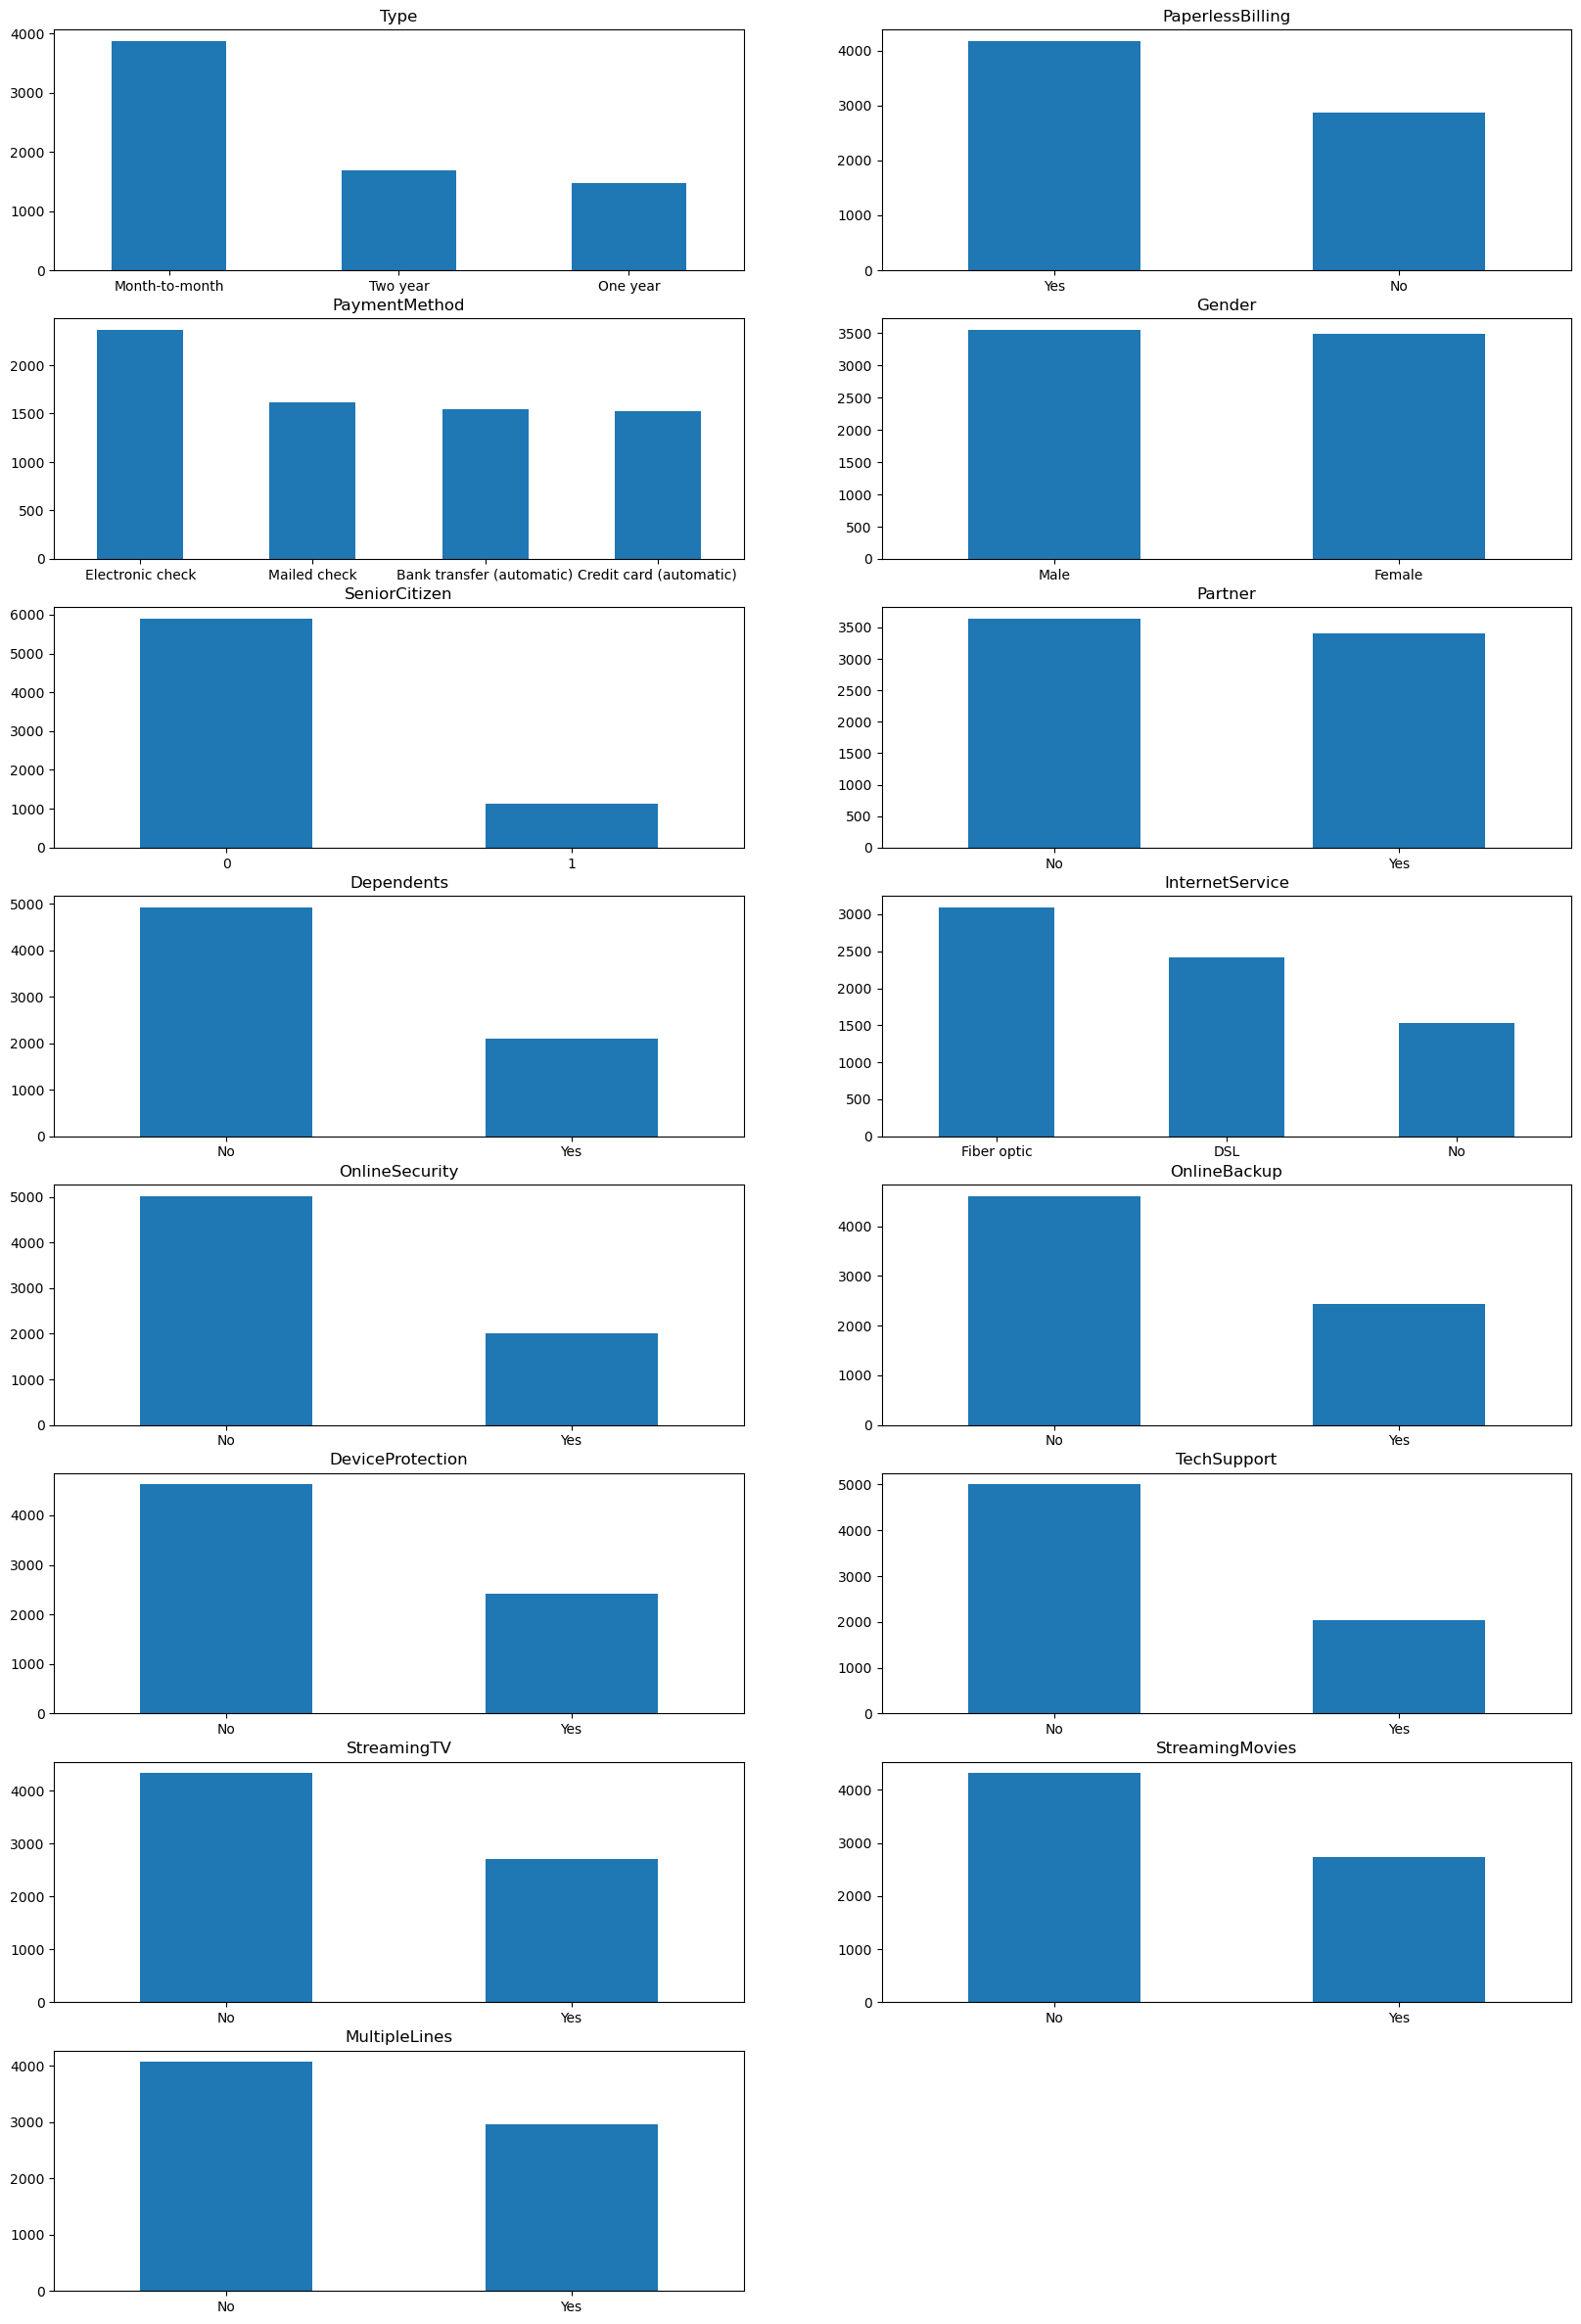

In [18]:
cat_categorical = ['Type', 'PaperlessBilling', 'PaymentMethod', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
               'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 
               'StreamingMovies', 'MultipleLines']

plt.figure(figsize=(20, 30))
for idx, column in enumerate(cat_categorical):
    ax = plt.subplot(8, 2, idx+1)
    df[column].value_counts().plot(kind='bar', title=column, ax=ax, rot=0)
plt.show()

На графиках мы можем наблюдать, что большинство пользователей оплачивают услуги ежемесячно.Как правило клиенты отказываются от дополнительных услуг(интернет-безопасность,потоковое ТВ,резервное копирование,защита устройства,техподдержка, просмотр потоковых фильмов).

Рассмотрим распределение для числовых данных.

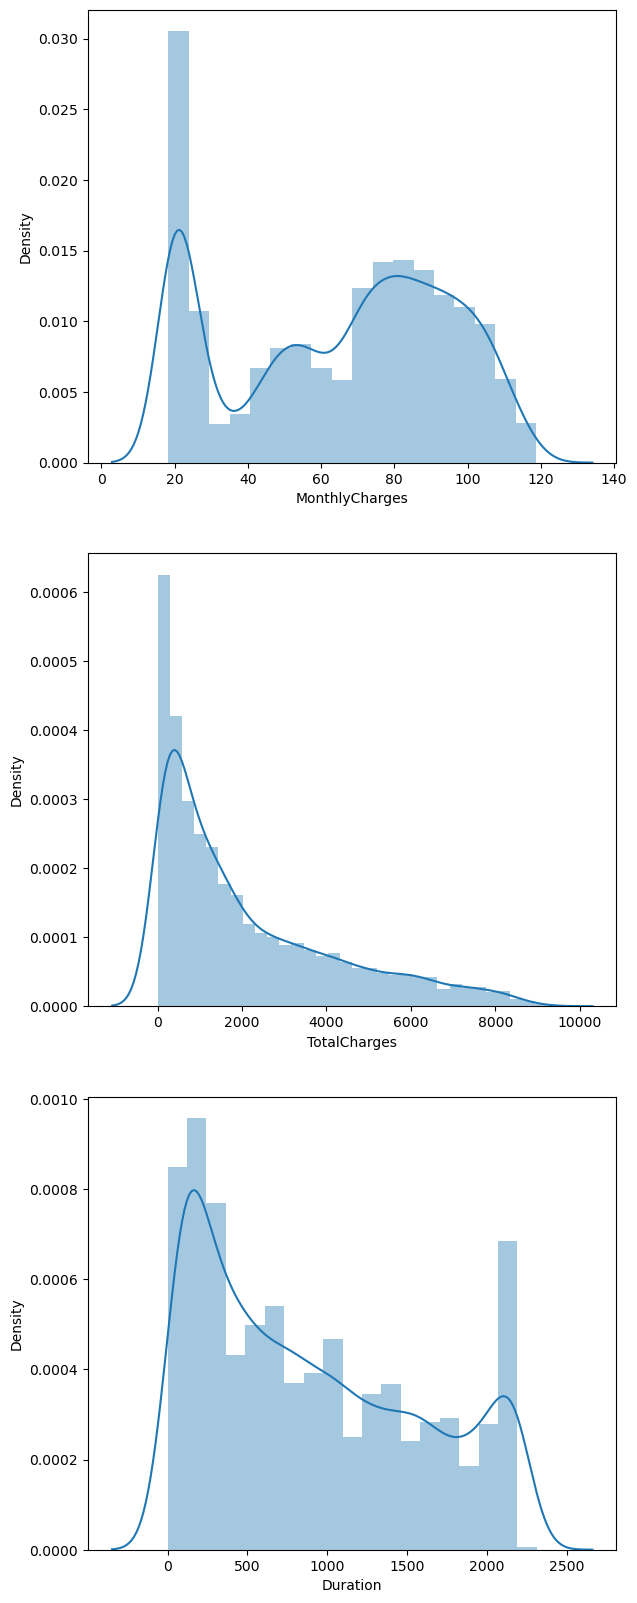

In [19]:
numeric = ['MonthlyCharges', 'TotalCharges', 'Duration']

plt.figure(figsize=(15, 20))

idx=-1
for col in numeric:
    idx+=2
    plt.subplot(3, 2, idx)
    sns.distplot(df[col])  
plt.show()

На диаграмме распределения "MonthlyCharges" можем наблюдать несколько пиков, что может означать наличие категорий пользователей.На диаграмме распределения "TotalCharges" данные скошены вправо. В признаке "Duration" видно два пика - новые и постоянные клиенты, пользующиеся услугами длительное время.

Рассмотрим, сколько составлет ежемесячная плата и количество дней пользованием услуг у клиентов, которые продолжают ими пользоваться и которые расторгли договор.

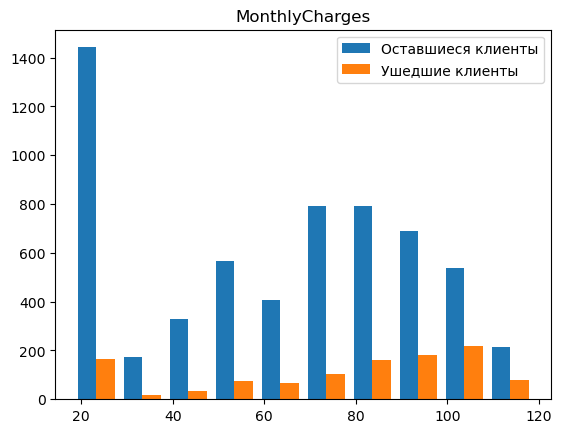

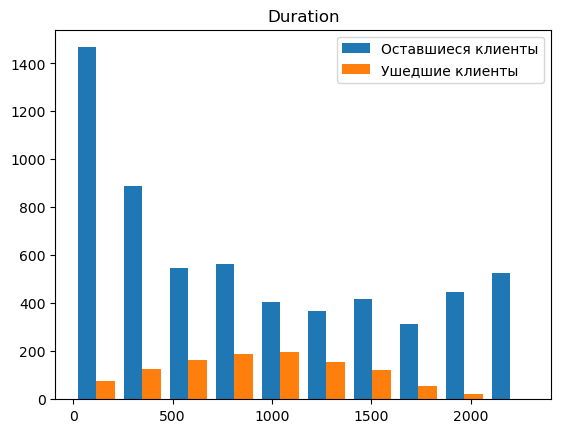

In [20]:
a = list(df[df['LastFlow']==0]['MonthlyCharges'])
b = list(df[df['LastFlow']==1]['MonthlyCharges'])
c = list(df[df['LastFlow']==0]['Duration'])
d = list(df[df['LastFlow']==1]['Duration'])
names = ['Оставшиеся клиенты', 'Ушедшие клиенты']

plt.hist([a, b], label=names)
plt.title('MonthlyCharges')
plt.legend()

plt.show()

plt.hist([c, d], label=names)
plt.title('Duration')
plt.legend()
plt.show();

Руководствуясь диаграммами мы можем сделать выводы. Чаще отказываются от услуг те клиенты, чья плата выше.Чаще всего клиенты отказываются от услуг в диапазоне 1000 дней,реже всего давние пользователи.

Рассмотрим корреляцию  между количественными признаками.

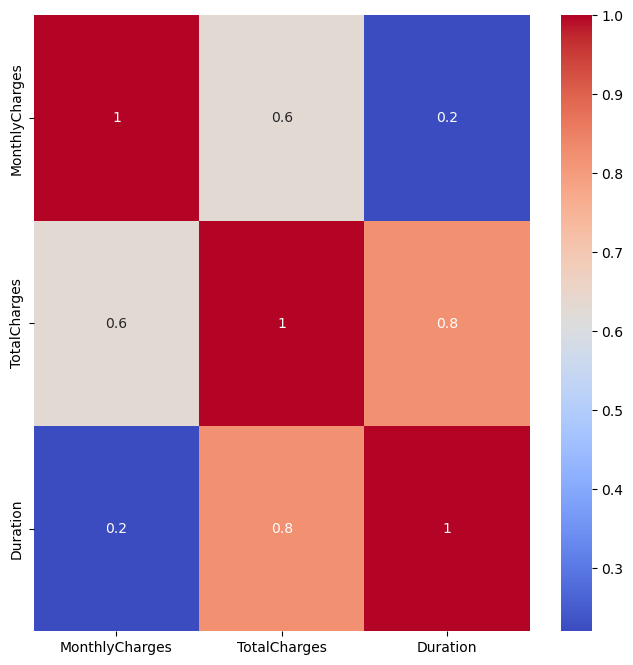

In [21]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[numeric].corr(), annot=True, fmt = '.1g', cmap= 'coolwarm')
plt.show()

Можем наблюдать высокую корреляцию между признаками "TotalCharges" и "Duration", а также "TotalCharges" и "MonthlyCharges". Во избежания переобучения модели удалим столбец "TotalCharges".

Воспользуемся Phik для анализа корреляции между признаками.

interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'LastFlow', 'Duration']
interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'LastFlow', 'Duration']
interval columns not set, guessing: ['MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'LastFlow', 'Duration']


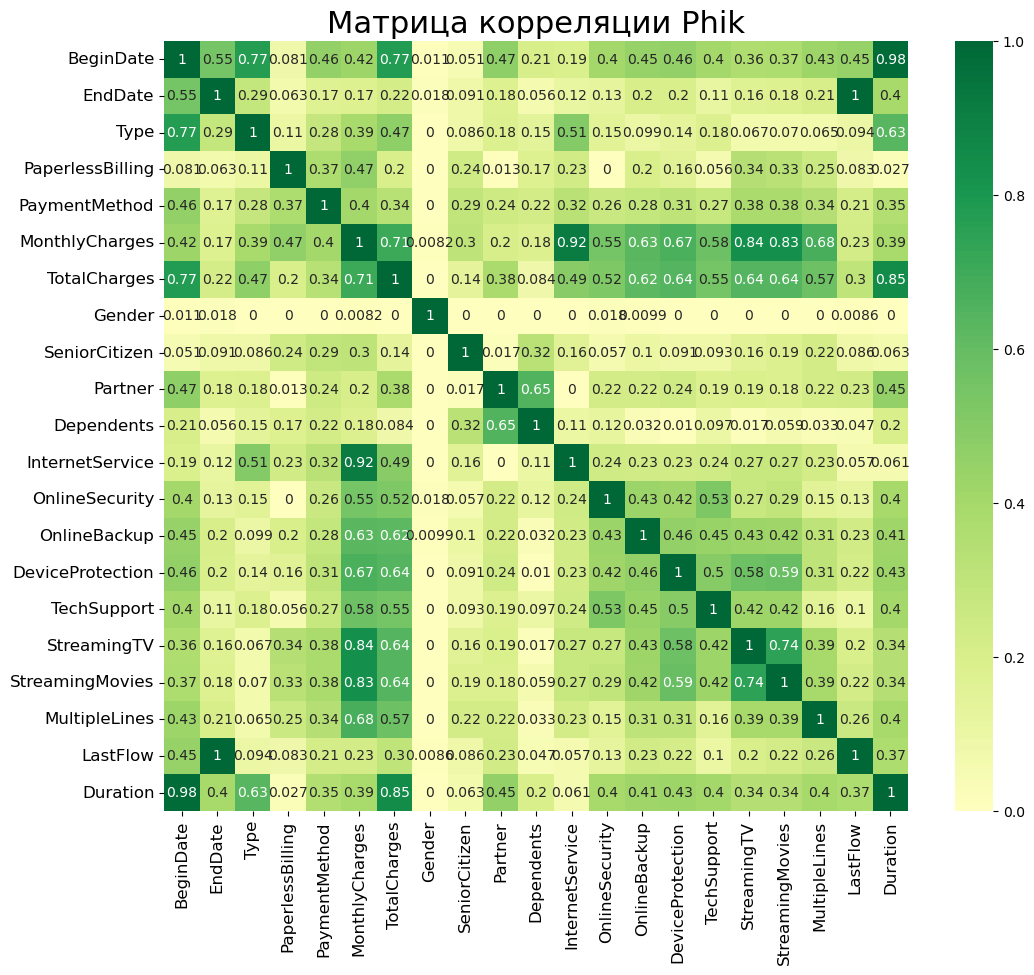

In [22]:
correlation_phik = df.drop('CustomerID', axis=1)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_phik.phik_matrix(),
            xticklabels=correlation_phik.phik_matrix().columns,
            yticklabels=correlation_phik.phik_matrix().columns,
            cmap='RdYlGn', center=0, annot=True)
plt.title('Матрица корреляции Phik', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Столбец MonthlyCharges сильно коррелирует с признаками OnlineBackup, DeviceProtection, TechSupport, StreamingTV и StreamingMovies, MultipleLines. Имеется сильная корреляция между признаком Duration и признаком BeginDate. Имеется сильная корреляция между признаками дополнительных интернет услуг. Ещё можно наблюдать, что гендерный признак имеет практически нулевую корреляцию с целевым признаком.

Удалим ненужные для обучения столбцы

In [23]:
del df['BeginDate'], df['EndDate'], df['TotalCharges'], df['CustomerID']

## Вывод

В ходе предобработки данных были выполнены следующие действия:
- Переименованы признаки "CustomerID", "Gender" для более понятного восприятия.
- Объединиkb датафреймы в один для комфортного дальнейшего анализа.
- Изменили типы данных в признаках "TotalCharges"(с object на datetime64), "BeginDate"(с object на datetime64), 'EndDate(с object на float64).
- Избавились от пропусков.
- Создали целевой признак "LastFlow".
- Создали признак "Duration", который указывает сколько дней клиент пользуется услугами.
В ходе исследовательского анализа были выполнены следующие действия:
- Рассмотрели распределение для категориальных признаков.
- Рассмотрели распределение для числовых данных.
- Рассмотрели, сколько составлет ежемесячная плата и количество дней пользованием услуг у клиентов, которые продолжают ими пользоваться и которые расторгли договор.
- Рассмотрели корреляцию между признаками.
- Удалили неинформативные признаки "BeginDate", "EndDate", "TotalCharges", "CustomerID"

# Обучение моделей

Разделим данные на признаки и целевой признак.

In [24]:
features = df.drop(['LastFlow'], axis=1)
target = df['LastFlow']

Разделим данные на обучающую и тестовую выборки.

In [25]:
features_train, features_test, target_train, target_test = train_test_split(features, 
                                                                            target, 
                                                                            test_size=0.25, 
                                                                            random_state=280823)

In [26]:
features_train.shape

(5282, 17)

In [27]:
features_test.shape

(1761, 17)

Для кодирования признаков будем использовать метод OHE(One-Hot Encoding).

In [28]:
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
print(ohe_features)

['Type', 'PaperlessBilling', 'PaymentMethod', 'Gender', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']


In [29]:
features_train_ohe = features_train.copy()

In [30]:
encoder_ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder_ohe.fit(features_train_ohe[ohe_features])
features_train_ohe[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train_ohe[ohe_features])
features_train_ohe = features_train_ohe.drop(ohe_features, axis=1)

In [31]:
features_train_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5282 entries, 3633 to 112
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   MonthlyCharges                           5282 non-null   float64
 1   SeniorCitizen                            5282 non-null   int64  
 2   Duration                                 5282 non-null   int64  
 3   Type_Month-to-month                      5282 non-null   float64
 4   Type_One year                            5282 non-null   float64
 5   Type_Two year                            5282 non-null   float64
 6   PaperlessBilling_No                      5282 non-null   float64
 7   PaperlessBilling_Yes                     5282 non-null   float64
 8   PaymentMethod_Bank transfer (automatic)  5282 non-null   float64
 9   PaymentMethod_Credit card (automatic)    5282 non-null   float64
 10  PaymentMethod_Electronic check           5282 

**Дерево решений**

In [32]:
model = DecisionTreeClassifier(random_state=280823)
parameters = {'criterion':['gini', 'entropy'], 
             'max_depth':[2,4,6,8,10,12]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=280823)
search = GridSearchCV(estimator=model, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='roc_auc', 
                      verbose=1, 
                      n_jobs=-1)
result = search.fit(features_train_ohe, target_train)
print('Лучший результат AUC-ROC для дерева решений: %s' % result.best_score_)
print('Лучшие гиперпараметры для дерева решений: %s' % result.best_params_)

Fitting 15 folds for each of 12 candidates, totalling 180 fits
Лучший результат AUC-ROC для дерева решений: 0.791683476528501
Лучшие гиперпараметры для дерева решений: {'criterion': 'entropy', 'max_depth': 6}


**Случайный лес**

In [33]:
model = RandomForestClassifier(random_state=280823)
parameters = {'max_depth':[6,8,10,12],
              'n_estimators':[30,50,100],
              'min_samples_split': [20,30],
              'min_samples_leaf':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=280823)
search = GridSearchCV(estimator=model, 
                      param_grid=parameters, 
                      cv=cv, 
                      scoring='roc_auc', 
                      verbose=1, 
                      n_jobs=-1)
result = search.fit(features_train_ohe, target_train)
print('Лучший результат AUC-ROC для случайного леса: %s' % result.best_score_)
print('Лучшие гиперпараметры для случайного леса: %s' % result.best_params_)

Fitting 15 folds for each of 48 candidates, totalling 720 fits
Лучший результат AUC-ROC для случайного леса: 0.8125012933285133
Лучшие гиперпараметры для случайного леса: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 50}


**CatBoost**

In [34]:
model_cat = CatBoostClassifier(random_state=280823,
                               cat_features=cat_categorical, 
                               loss_function='Logloss',
                               eval_metric='AUC')
parameters = {'learning_rate': [0.1, 0.5],
              'iterations': [1000],
              'depth': [5,7,9]}

search = GridSearchCV(estimator=model_cat, 
                      param_grid=parameters,
                      cv=5, 
                      scoring='roc_auc',
                      n_jobs=1,
                      verbose=50)
result = search.fit(features_train, target_train)
print('Лучший результат AUC-ROC для CatBoost: %s' % result.best_score_)
print('Лучшие гиперпараметры для CatBoost: %s' % result.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START depth=5, iterations=1000, learning_rate=0.1.................
0:	total: 174ms	remaining: 2m 53s
1:	total: 186ms	remaining: 1m 32s
2:	total: 203ms	remaining: 1m 7s
3:	total: 220ms	remaining: 54.9s
4:	total: 239ms	remaining: 47.5s
5:	total: 256ms	remaining: 42.4s
6:	total: 267ms	remaining: 37.9s
7:	total: 283ms	remaining: 35.1s
8:	total: 300ms	remaining: 33.1s
9:	total: 317ms	remaining: 31.4s
10:	total: 334ms	remaining: 30s
11:	total: 351ms	remaining: 28.9s
12:	total: 367ms	remaining: 27.9s
13:	total: 386ms	remaining: 27.1s
14:	total: 403ms	remaining: 26.5s
15:	total: 421ms	remaining: 25.9s
16:	total: 439ms	remaining: 25.4s
17:	total: 457ms	remaining: 24.9s
18:	total: 474ms	remaining: 24.5s
19:	total: 491ms	remaining: 24.1s
20:	total: 509ms	remaining: 23.7s
21:	total: 526ms	remaining: 23.4s
22:	total: 540ms	remaining: 22.9s
23:	total: 557ms	remaining: 22.6s
24:	total: 577ms	remaining: 22.5s
25:	total: 594ms	re

Наилучший результат показала модель CatBoost(AUC-ROC - 0.91) с гиперпараметрами depth=5, iterations=1000, learning_rate=0.1.Данную модель и рассмотрим на тестовой выборке.

# Тестирование лучшей модели

In [35]:
cat_model = CatBoostClassifier(random_state=280823,
                               cat_features = cat_categorical, 
                               loss_function="Logloss",
                               eval_metric='AUC',
                               depth=5, 
                               iterations=1000, 
                               learning_rate=0.1,
                               verbose=False)

cat_model.fit(features_train, target_train)

cat_prediction = cat_model.predict_proba(features_test)[:, 1]

auc_roc = roc_auc_score(target_test, cat_prediction)

print(f'Лучший результат AUC-ROC для CatBoost на тестовой выборке: {auc_roc}')

Лучший результат AUC-ROC для CatBoost на тестовой выборке: 0.9228464314904028


**Матрица ошибок**

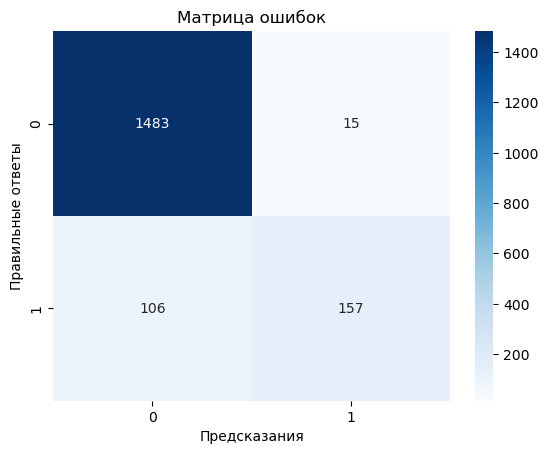

In [36]:
prediction = cat_model.predict(features_test)
matrix_error = confusion_matrix(target_test, prediction)

sns.heatmap(matrix_error, annot=True, cmap='Blues', fmt='g')
plt.title('Матрица ошибок')
plt.xlabel('Предсказания')
plt.ylabel('Правильные ответы')
plt.show()

Исходя из этой матрицы, можно сделать следующие выводы:

Модель хорошо работает с классом 0, так как количество правильно предсказанных объектов этого класса (1478) значительно превышает неправильне предсказанния объектов класса 0 (20).

**Рассмотрим важность признаков при обучении модели CatBoost.**

In [37]:
features_test.columns

Index(['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Duration'],
      dtype='object')

In [38]:
features_name = ['Type', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'Gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines', 'Duration']

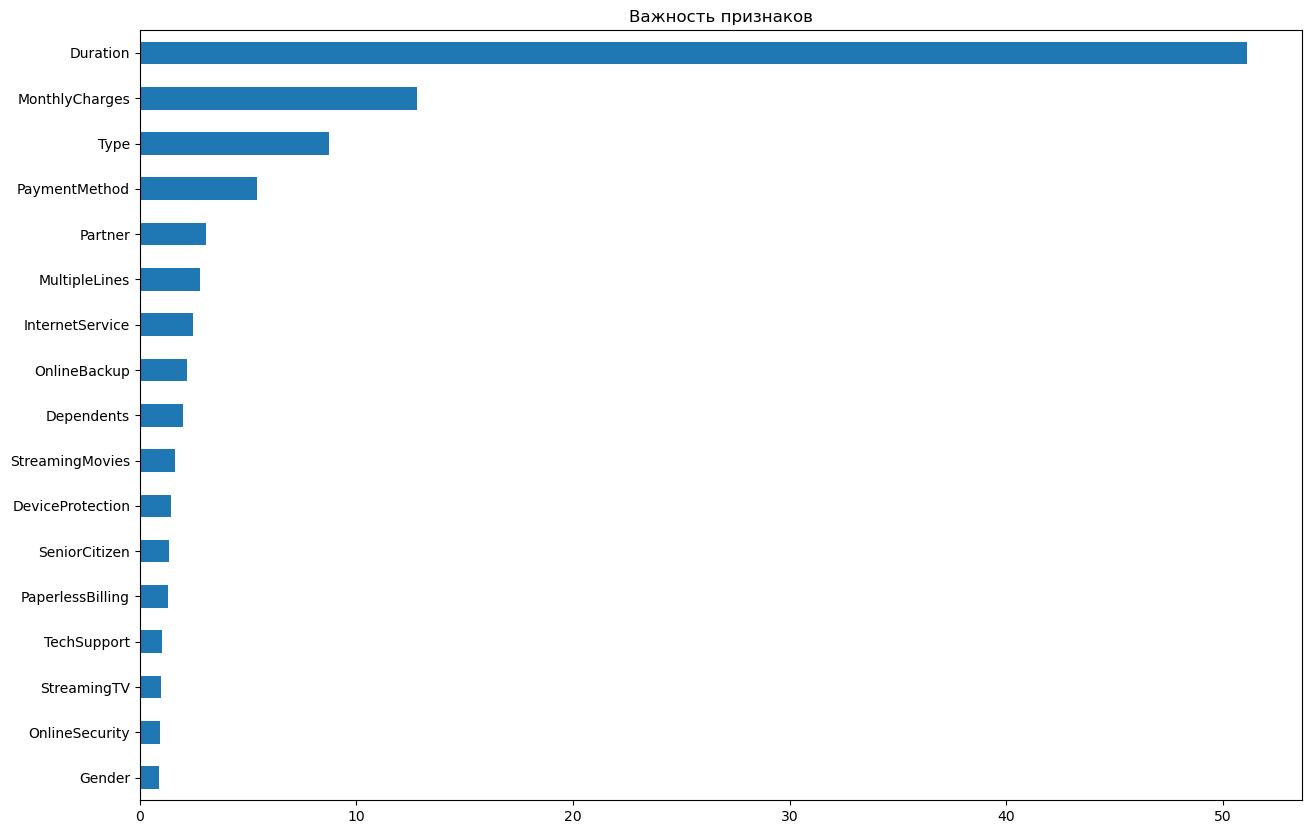

In [39]:
importances =  cat_model.feature_importances_
cat_importances = pd.Series(importances, index=features_name)
cat_importances_sort = cat_importances.sort_values()

cat_importances_sort.plot.barh(title='Важность признаков', figsize=(15,10));

Больше всего на модель CatBoost  влияют следующие признаки признаки: "Duration" (Имеет наибольшее влияние), "MonthlyCharges", "Type","PaymentMethod"

## Вывод

- Разделили данные на признаки и целевой признак
- Закодировали признаки методом прямого кодирования
- Разделим данные на обучающую и тестовую выборки
- Обучили модель дерева решений.Наилучшего значения AUC-ROC - 0.78 добились с гиперпараметрами: 'criterion': 'gini', 'max_depth': 6 
- Обучили модель случайного леса. Наилучшего значения AUC-ROC - 0.82 добились с гиперпараметрами: 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 30, 'n_estimators': 100
- Обучили модель CatBoost. Наилучшего значения AUC-ROC - 0.91 добились с гиперпараметрами: 'depth': 5, 'iterations': 1000, 'learning_rate': 0.1
- Обучили лучшую модель(CatBoost) на тестовой выборке(AUC-ROC - 0.92)
- Убедились в работоспособности нашей модели ознакомившись с матрицей ошибок. 
- Рассмотрели важность признаков при обучении модели CatBoost. Больше всего на модель CatBoost  влияют следующие признаки признаки: "Duration" (Имеет наибольшее влияние), "MonthlyCharges", "Type","PaymentMethod"

# Общий вывод

По результатам анализа в качестве итоговой модели была выбрана CatBoost, которая показала значение метрики AUC-ROC = 0.92. Нам удалось получить такое значение метрики используя следующие гиперпараметры :
- depth: 5
- iterations: 1000
- learning_rate: 0.1

**Список признаков, используемых для обучения лучшей модели,описание их предобработки:**

Type, PaperlessBilling, PaymentMethod, MonthlyCharges, Gender, SeniorCitizen, Partner, Dependents, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, MultipleLines, Duration.

**Для предобработки признаков используемых для обучения лучшей модели были выполнены следующие действия:**

- Переименование признака 'Gender'(изначальное написание 'gender')
- Заполнили пропуски в признаках: "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "MultipleLines"  на "No".
- Заполнили пропуски у признака "EndDate" значением "2020-02-01"(дата выгрузки), благодаря этому смогли создать целевой признак 'LastFlow'.
- Были изменены типы данных у признаков 'TotalCharges'(из object в float64), 'BeginDate'(из object в datetime64[ns]), 'EndDate'(из object в datetime64[ns])
- Был создам признак 'Duration'. Данный признак мы смогли получить рассчитав разность между 'EndDate' и 'BeginDate', затем перевели результат в дни.
- Признаки для модели CatBoost не кодировались, т.к. для данной модели нет в этом необходимости.